In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-02-19 19:51:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   119KB/s    in 0.6s    

2020-02-19 19:51:11 (119 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [36]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


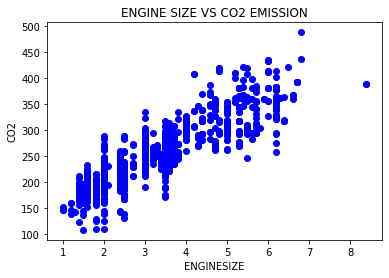

In [49]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.title("ENGINE SIZE VS CO2 EMISSION")
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2')
plt.show()

In [50]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [53]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])



In [54]:
poly = PolynomialFeatures(degree= 2)

In [60]:
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [61]:
train_yhat = regr.fit(train_x_poly,train_y)

In [62]:
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficient:  [[ 0.         48.60288489 -1.32022592]]
Intercept:  [110.5600139]


In [63]:
a =regr.coef_
a

array([[ 0.        , 48.60288489, -1.32022592]])

Text(0, 0.5, 'co2 emissions')

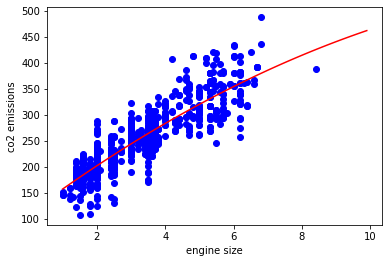

In [72]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color="blue")
XX =np.arange(1.0, 10, 0.1)
yy = regr.intercept_[0] + regr.coef_[0][1]*XX + regr.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel('engine size')
plt.ylabel('co2 emissions')

In [73]:
from sklearn.metrics import r2_score


In [74]:
test_x_poly = poly.fit_transform(test_x)
test_yhat = regr.predict(test_x_poly)

In [76]:
print('mean absolute error: %.2f' %np.mean(np.absolute(test_yhat - test_y)))

mean absolute error: 24.55


In [77]:
print("mean squared error: %.2f" % np.mean((test_yhat - test_y)**2))

mean squared error: 1044.97


In [81]:
print("R2 score: %.2f" %r2_score(test_yhat, test_y))

R2 score: 0.67


In [87]:
#using 3 degree polynomial
poly3 = PolynomialFeatures(degree=3)
clf = linear_model.LinearRegression()
train_x2_poly = poly3.fit_transform(train_x)
train_y3_ =clf.fit(train_x2_poly, train_y)
c = clf.coef_
i = clf.intercept_
print(c)
print(i)

[[ 0.         42.20192158  0.48204561 -0.15280674]]
[117.22488674]


Text(0, 0.5, 'co2 emissions')

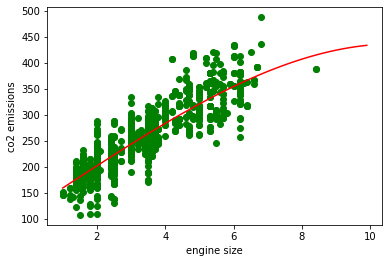

In [91]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color="green")
XXX = np.arange(1.0, 10, 0.1)
yyy = i + c[0][1]*XXX + c[0][2]*np.power(XXX,2) + c[0][3]*np.power(XXX,3)
plt.plot(XXX, yyy, "-r")
plt.xlabel("engine size")
plt.ylabel("co2 emissions")

In [95]:
test_x2_poly = poly3.fit_transform(test_x) 
test_y3_ = clf.predict(test_x2_poly)


In [96]:
print("mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))

mean absolute error: 24.44


In [97]:
print('mean squared error: %.2f' %np.mean((test_y3_- test_y)**2))

mean squared error: 1036.35


In [98]:
print("R2 score: %.2f" %r2_score(test_y3_,test_y))

R2 score: 0.67


In [100]:
#understanding of non linear regression
x4 = np.arange(-5.0, 5.0, 0.1)
x4

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [102]:
y = 2*(x4) + 3
y

array([-7.00000000e+00, -6.80000000e+00, -6.60000000e+00, -6.40000000e+00,
       -6.20000000e+00, -6.00000000e+00, -5.80000000e+00, -5.60000000e+00,
       -5.40000000e+00, -5.20000000e+00, -5.00000000e+00, -4.80000000e+00,
       -4.60000000e+00, -4.40000000e+00, -4.20000000e+00, -4.00000000e+00,
       -3.80000000e+00, -3.60000000e+00, -3.40000000e+00, -3.20000000e+00,
       -3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
       -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
       -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
       -6.00000000e-01, -4.00000000e-01, -2.00000000e-01, -2.48689958e-14,
        2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
        1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
        1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
        2.60000000e+00,  2.80000000e+00,  3.00000000e+00,  3.20000000e+00,
        3.40000000e+00,  

In [104]:
x4.size

100

In [119]:
y_noise =  2 * np.random.normal(size=x4.size)
y_noise

array([-0.29623795,  2.24529084,  0.81441356,  0.54970862, -1.13867941,
        1.1419954 , -4.64582083,  1.11451506,  0.87539632,  0.90444181,
        0.14921681, -2.02227768,  0.17761955, -1.47863907, -0.34601034,
       -0.68245142,  2.24632743,  3.93279566, -1.01913509, -1.87168464,
        0.87928723, -0.73120519,  0.96561613,  1.14693164,  0.15641585,
        0.18207057, -2.17220347,  1.69031431, -0.19875655, -1.9707509 ,
        0.48635486,  1.87790853,  1.7111135 ,  0.96230914, -2.75204244,
        5.30318829, -1.22989715, -3.07349882, -0.35463668, -4.44970829,
        1.01471659, -0.31541597,  1.64010059, -0.0181454 ,  0.20995723,
        1.02006582,  2.25253219,  0.60146533,  1.38478919,  0.73698708,
        0.76208909,  2.68739843,  0.77242441, -0.02468222, -0.39244435,
       -0.60914778,  4.50929259, -1.07017038, -0.99853487,  2.82571975,
        0.0688022 , -1.25409898,  1.59676842, -1.62374323,  1.30326471,
       -1.98965874,  0.5235406 ,  3.64057169, -0.62240658,  2.74

In [120]:
y_data = y + y_noise

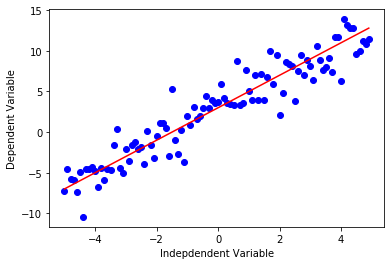

In [121]:
plt.plot(x4, y_data,  'bo')
plt.plot(x4,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [122]:
x5 = np.linspace(1960, 2015, 55)
x5

array([1960.        , 1961.01851852, 1962.03703704, 1963.05555556,
       1964.07407407, 1965.09259259, 1966.11111111, 1967.12962963,
       1968.14814815, 1969.16666667, 1970.18518519, 1971.2037037 ,
       1972.22222222, 1973.24074074, 1974.25925926, 1975.27777778,
       1976.2962963 , 1977.31481481, 1978.33333333, 1979.35185185,
       1980.37037037, 1981.38888889, 1982.40740741, 1983.42592593,
       1984.44444444, 1985.46296296, 1986.48148148, 1987.5       ,
       1988.51851852, 1989.53703704, 1990.55555556, 1991.57407407,
       1992.59259259, 1993.61111111, 1994.62962963, 1995.64814815,
       1996.66666667, 1997.68518519, 1998.7037037 , 1999.72222222,
       2000.74074074, 2001.75925926, 2002.77777778, 2003.7962963 ,
       2004.81481481, 2005.83333333, 2006.85185185, 2007.87037037,
       2008.88888889, 2009.90740741, 2010.92592593, 2011.94444444,
       2012.96296296, 2013.98148148, 2015.        ])